### **Elastic Net Regression: A Combination of L1 and L2 Regularization**

Elastic Net is a **regularized regression** method that combines both **Lasso (L1) and Ridge (L2) penalties** to overcome their individual limitations. The loss function is:

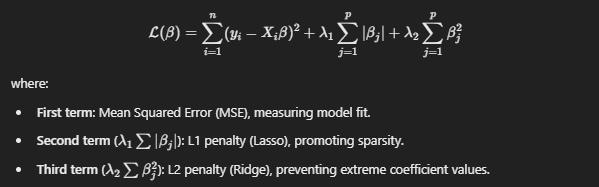

### **Why Use Elastic Net?**
1. **Feature Selection + Stability:** Lasso can **select features** but may drop correlated variables arbitrarily. Elastic Net **keeps some correlated features**.
2. **Handles Multicollinearity:** Ridge prevents overfitting by shrinking coefficients, but does not set them to zero. Elastic Net **balances both effects**.
3. **Better than Lasso When \( p > n \) (More Features than Samples):** Lasso struggles when the number of features is much larger than the number of observations. Elastic Net **distributes shrinkage across correlated features**.

---

### **Gradient Computation for Optimization**
To optimize, we compute the derivative of the loss function:

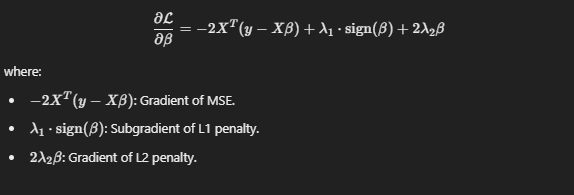
---

### **Optimization Methods**
Elastic Net does **not** have a closed-form solution due to L1 regularization. It is optimized using:
1. **Coordinate Descent (default in scikit-learn)**
2. **Gradient Descent with Subgradients**
3. **Proximal Gradient Descent**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_regression(n_samples=1000,n_features=1,noise=70,random_state=41)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)


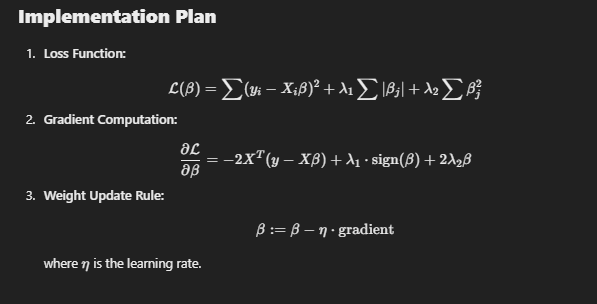

In [ ]:
class ElasticNetRegression:
    def __init__(self, learning_rate=0.01, lambda1=0.1, lambda2=0.1, max_iter=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.lambda1 = lambda1  # L1 Regularization
        self.lambda2 = lambda2  # L2 Regularization
        self.max_iter = max_iter
        self.tol = tol
        self.beta = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.beta = np.zeros(n_features)  # Initialize weights

        for i in range(self.max_iter):
            y_pred = X.dot(self.beta)  # Compute predictions
            gradient = -2 * X.T.dot(y - y_pred) / n_samples  # MSE gradient
            l1_penalty = self.lambda1 * np.sign(self.beta)  # L1 subgradient
            l2_penalty = 2 * self.lambda2 * self.beta  # L2 gradient
            
            gradient += l1_penalty + l2_penalty  # Add regularization

            beta_new = self.beta - self.learning_rate * gradient  # Gradient update

            # Convergence check
            if np.linalg.norm(beta_new - self.beta, ord=1) < self.tol:
                break

            self.beta = beta_new  # Update weights

    def predict(self, X):
        return X.dot(self.beta)